In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
print(df_train.shape)
print(list(df_train))
print(df_test.shape)
print(list(df_test))
# concat into one dataset
df_train['data'] = 'train'
df_test['data'] = 'test'
df = pd.concat((df_train, df_test), axis=0)
print(df.shape)
print(list(df))

(3000, 23)
['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']
(4398, 22)
['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']
(7398, 24)
['id', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue', 'data']


# Go through and check each column

### id: unique increment id, no nan value

In [16]:
print(df['id'].describe())
print(len(df['id'].unique()))

count    7398.000000
mean     3699.500000
std      2135.762978
min         1.000000
25%      1850.250000
50%      3699.500000
75%      5548.750000
max      7398.000000
Name: id, dtype: float64
7398


In [19]:
print(df['id'].isnull().value_counts())

False    7398
Name: id, dtype: int64


### belongs_to_collection: whether a movie belongs to a collection

In [26]:
print(df[df['data']=='train']['belongs_to_collection'].isnull().value_counts())
print(df[df['data']=='test']['belongs_to_collection'].isnull().value_counts())

True     2396
False     604
Name: belongs_to_collection, dtype: int64
True     3521
False     877
Name: belongs_to_collection, dtype: int64


In [37]:
# example
print(df['belongs_to_collection'].values[0])

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]


### budget: about 25% is missing, the distribution between train and test is similar

In [42]:
print(df['budget'].describe())

count    7.398000e+03
mean     2.260146e+07
std      3.694867e+07
min      0.000000e+00
25%      0.000000e+00
50%      7.500000e+06
75%      2.800000e+07
max      3.800000e+08
Name: budget, dtype: float64


In [41]:
# a lot of zero budgets, should be identified as missing
print(df[df['data']=='train']['budget'].isnull().value_counts())
print(df[df['data']=='test']['budget'].isnull().value_counts())
print(df[(df['data']=='train')&(df['budget']==0)].shape)
print(df[(df['data']=='test')&(df['budget']==0)].shape)

False    3000
Name: budget, dtype: int64
False    4398
Name: budget, dtype: int64
(812, 24)
(1211, 24)


count    5.375000e+03
mean     3.110802e+07
std      4.018026e+07
min      1.000000e+00
25%      5.053316e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


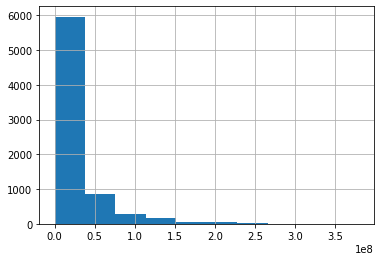

count    2.188000e+03
mean     3.089305e+07
std      4.026785e+07
min      1.000000e+00
25%      5.150000e+06
50%      1.600000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


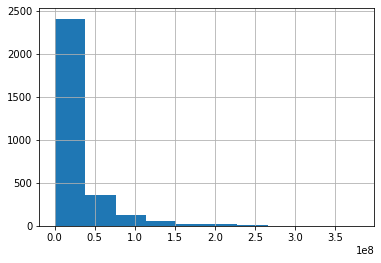

count    2.188000e+03
mean     3.089305e+07
std      4.026785e+07
min      1.000000e+00
25%      5.150000e+06
50%      1.600000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


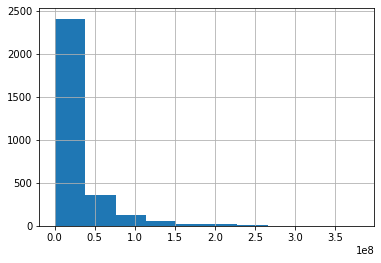

In [49]:
print(df[df['budget']!=0]['budget'].describe())
df['budget'].hist()
plt.show()
print(df_train[df_train['budget']!=0]['budget'].describe())
df_train['budget'].hist()
plt.show()
print(df_train[df_train['budget']!=0]['budget'].describe())
df_train['budget'].hist()
plt.show()